## 1번 문제

1. num_1 폴더의 tsv 파일을 데이터프레임으로 불러온다. 
2. 숫자 의미를 가지지 않은 order_id는 str의 형태로 변경한다. 
3. 가장 많이 주문을 한 item_name과 그 수량을 출력한다. 
4. item당 주문 총량을 구하고 바형 그래프로 시각화하여 출력한다. 
5. item_price가 object형태의 데이터임으로 float 형태로 변경한다. 
6. 주문당 평균 계산 금액을 출력한다. 
7. 각 아이템의 가격을 출력 후 가격 분포 그래프와 가격 히스토그램을 출력한다. 
8. "Chicken Bowl"을 2개 이상 주문한 고객들의 "Chicken Bowl" 메뉴의 총 주문 수량을 출력한다. 


In [15]:
import pandas as pd
chipo = pd.read_csv('./num_1/chipotle.tsv', sep = '\t')
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [11]:
# order_id는 숫자의 의미를 가지지 않기 때문에 str으로 변환
chipo['order_id'] = chipo['order_id'].astype(str)

In [6]:
item_count = chipo['item_name'].value_counts()
item_count

Chicken Bowl                             726
Chicken Burrito                          553
Chips and Guacamole                      479
Steak Burrito                            368
Canned Soft Drink                        301
Steak Bowl                               211
Chips                                    211
Bottled Water                            162
Chicken Soft Tacos                       115
Chips and Fresh Tomato Salsa             110
Chicken Salad Bowl                       110
Canned Soda                              104
Side of Chips                            101
Veggie Burrito                            95
Barbacoa Burrito                          91
Veggie Bowl                               85
Carnitas Bowl                             68
Barbacoa Bowl                             66
Carnitas Burrito                          59
Steak Soft Tacos                          55
6 Pack Soft Drink                         54
Chips and Tomatillo Red Chili Salsa       48
Chicken Cr

In [8]:
# 가장 많이 주문한 item : top 10을 출력
# count, size, value_count의 차이는 무엇인가?
item_count = chipo['item_name'].value_counts()[:10]
# item_count.head(10)
for idx, (val, cnt) in enumerate(item_count.iteritems(), 1):
    print("Top", idx, ":", val, cnt)

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chips and Fresh Tomato Salsa 110


In [4]:
chipo['item_name'].value_counts().index.tolist()[0]

'Chicken Bowl'

In [5]:
# item당 주문 개수를 출력
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10] # item당 주문 개수를 출력

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

In [6]:
# item당 주문 총량을 출력
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10] # item당 주문 총량을 출력

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

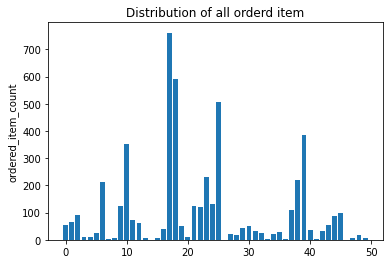

In [9]:
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()
 
plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all orderd item')
 
plt.show()

In [16]:
# column 단위 데이터에 apply 함수로 전처리를 적용
# def func_1(x):
# lambda 매개변수 : 표현식(대개 함수를 사용)
def func_1(input_x):
    result = float(input_x.replace("$", ""))
    return result
chipo['item_price'] = chipo['item_price'].apply(lambda x: func_1(x))
chipo.describe()

,order_id,quantity,item_price
count,4622.000000,4622.000000,4622.000000
mean,927.254868,1.075725,7.464336
std,528.890796,0.410186,4.245557
min,1.000000,1.000000,1.090000
25%,477.250000,1.000000,3.390000
50%,926.000000,1.000000,8.750000
75%,1393.000000,1.000000,9.250000
max,1834.000000,15.000000,44.250000


In [14]:
# 주문당 평균 계산금액을 출력
chipo.groupby('order_id')['item_price'].sum().mean()

18.811428571428568

In [15]:
# 각 아이템의 가격을 계산
chipo_one_item = chipo[chipo.quantity == 1]
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item.sort_values(by = "item_price", ascending = False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


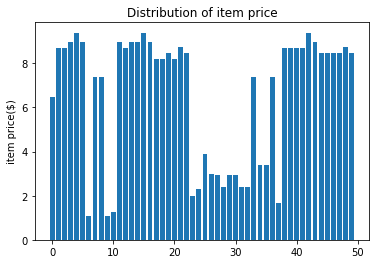

In [16]:
# 아이템 가격 분포 그래프를 출력
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()
 
plt.bar(x_pos, item_price, align='center')
plt.ylabel('item price($)')
plt.title('Distribution of item price')
 
plt.show()

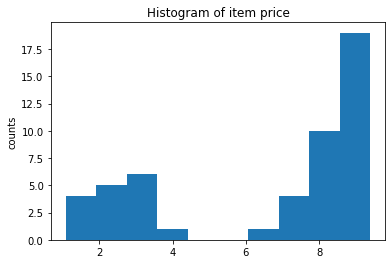

In [17]:
# 아이템 가격 히스토그램을 출력
plt.hist(item_price)
plt.ylabel('counts')
plt.title('Histogram of item price')

plt.show()

In [17]:
# “Chicken Bowl”을 2개 이상 주문한 고객들의 "Chicken Bowl" 메뉴의 총 주문 수량을 구합니다.
chipo_chicken = chipo[chipo['item_name'] == "Chicken Bowl"]
print(len(chipo_chicken))
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']
print(len(chipo_chicken_ordersum))
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]

print(len(chipo_chicken_result))
chipo_chicken_result.head(5)

726
615
114


order_id
2      2
34     2
70     2
93     2
124    3
Name: quantity, dtype: int64

## 2번 문제

1. num_2 폴더의 csv 파일을 데이터프레임으로 불러온다. 
2. 'beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol' 간의 상관관계 행렬을 구한다. 
3. 행렬 히트맵을 시각화 한다. 
4. 'beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol' 컬럼별 산점도 그래프를 표시한다. 
5. 국가별 술 소비량 대비 알콜 비율 컬럼을 추가하여 국가별 순위를 시각화하여 출력한다. 

In [20]:
drinks = pd.read_csv('./num_2/drinks.csv')
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [22]:
# 피처간의 상관계수 행렬을 구합니다.
cols = ['beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol']
corr = drinks[cols].corr(method = 'pearson')
print(corr)

                              beer_servings  spirit_servings  wine_servings  \
beer_servings                      1.000000         0.458819       0.527172   
spirit_servings                    0.458819         1.000000       0.194797   
wine_servings                      0.527172         0.194797       1.000000   
total_litres_of_pure_alcohol       0.835839         0.654968       0.667598   

                              total_litres_of_pure_alcohol  
beer_servings                                     0.835839  
spirit_servings                                   0.654968  
wine_servings                                     0.667598  
total_litres_of_pure_alcohol                      1.000000  


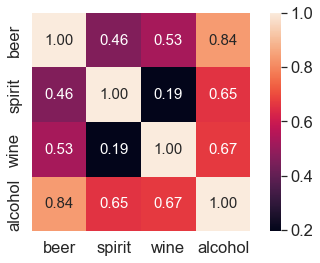

In [23]:
import seaborn as sns

# corr 행렬 히트맵을 시각화합니다.
cols_view = ['beer', 'spirit', 'wine', 'alcohol'] # 그래프 출력을 위한 cols 이름을 축약합니다.
sns.set(font_scale=1.5)
hm = sns.heatmap(corr.values,
            cbar=True,
            annot=True, 
            square=True,
            fmt='.2f',
            annot_kws={'size': 15},
            yticklabels=cols_view,
            xticklabels=cols_view)

plt.tight_layout()
plt.show()

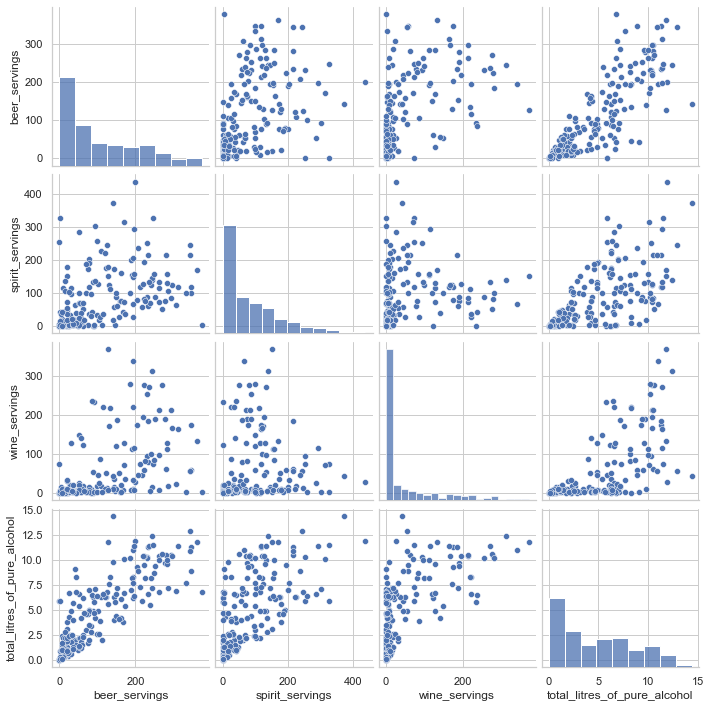

In [24]:
# 시각화 라이브러리를 이용한 피처간의 scatter plot을 출력합니다.
sns.set(style='whitegrid', context='notebook')
sns.pairplot(drinks[['beer_servings', 'spirit_servings', 
                     'wine_servings', 'total_litres_of_pure_alcohol']], height=2.5)
plt.show()

In [25]:
# total_servings 피처를 생성합니다.
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']

# 술 소비량 대비 알콜 비율 피처를 생성합니다.
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)

# 순위 정보를 생성합니다.
country_with_rank = drinks[['country', 'alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending=0)
country_with_rank.head(5)

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111


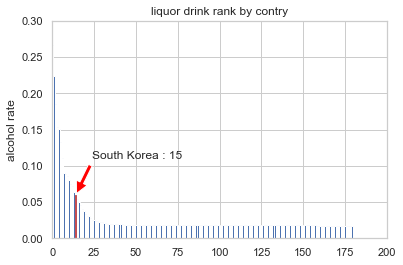

In [26]:
# 국가별 순위 정보를 그래프로 시각화합니다.
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()
 
bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by contry')
plt.axis([0, 200, 0, 0.3])

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1), 
             xy=(korea_rank, korea_alc_rate), 
             xytext=(korea_rank + 10, korea_alc_rate + 0.05),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.show()

## 3번 문제

1. num_3 폴더의 csv 파일을 데이터프레임으로 불러온다. 
2. uselog를 제외한 3개의 데이터 프레임을 조인 결합 후 결측치를 확인한다. 
3. 고객의 데이터를 'class_name', 'campaign_name', 'gernder', 'is_deleted'별 집계를 출력한다. 
4. 3번 과정과 같은 작업을 2019년 01월 01일부터 최근의 고객 데이터를 출력한다.
5. 월별 'costomer_id' 이용 이력 데이터를 집계하여 출력한다. 
6. 이용 이력 데이터를 통하여 요일별 이용 여부를 계산하고 이용 여부가 4회 이상이면 1 아니면 0인 컬럼을 추가한다. 3
7. 'end_date' 컬럼을 복사하여 'calc_date' 컬럼을 추가하고 결측데이터를 '20090430'로 변경한다. 
8. 회원의 기간을 계산하여 컬럼을 추가한다. 


In [18]:
import pandas as pd
uselog = pd.read_csv('./num_3/use_log.csv')
print(len(uselog))
uselog.head()

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


In [19]:
customer = pd.read_csv('./num_3/customer_master.csv')
print(len(customer))
customer.head()

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


In [20]:
class_master = pd.read_csv('./num_3/class_master.csv')
print(len(class_master))
class_master.head()

3


,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


In [21]:
campaign_master = pd.read_csv('./num_3/campaign_master.csv')
print(len(campaign_master))
campaign_master.head()

3


,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


In [22]:
customer_join = pd.merge(customer, class_master, on="class", how="left")
customer_join = pd.merge(customer_join, campaign_master, on="campaign_id", how="left")
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [118]:
print(len(customer))
print(len(customer_join))

4192
4192


In [119]:
customer_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

In [120]:
customer_join.groupby("class_name").count()["customer_id"]

class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

In [121]:
customer_join.groupby("campaign_name").count()["customer_id"]

campaign_name
0_입회비반액할인     650
1_입회비무료       492
2_일반         3050
Name: customer_id, dtype: int64

In [24]:
customer_join.groupby("gender").count()["customer_id"]

gender
F    1983
M    2209
Name: customer_id, dtype: int64

In [123]:
customer_join.groupby("is_deleted").count()["customer_id"]

is_deleted
0    2842
1    1350
Name: customer_id, dtype: int64

In [25]:
customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])
customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])
customer_start = customer_join.loc[customer_join["start_date"]>pd.to_datetime("20190101")]
customer_newer = customer_start.loc[(customer_join["end_date"]>=pd.to_datetime("20190331"))|(customer_join["end_date"].isna())]
print(len(customer_newer))

222


In [125]:
customer_newer.groupby("class_name").count()["customer_id"]

class_name
0_종일    95
1_주간    59
2_야간    68
Name: customer_id, dtype: int64

In [126]:
customer_newer.groupby("campaign_name").count()["customer_id"]

campaign_name
2_일반    222
Name: customer_id, dtype: int64

In [127]:
customer_newer.groupby("gender").count()["customer_id"]

gender
F    110
M    112
Name: customer_id, dtype: int64

In [128]:
customer_newer.groupby("is_deleted").count()["customer_id"]

is_deleted
0    212
1     10
Name: customer_id, dtype: int64

In [26]:
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["연월"] = uselog["usedate"].dt.strftime("%Y%m")
uselog_months = uselog.groupby(["연월","customer_id"],as_index=False).count()
uselog_months.rename(columns={"log_id":"count"}, inplace=True)
del uselog_months["usedate"]
uselog_months.head()

,연월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [29]:
uselog["weekday"] = uselog["usedate"].dt.weekday
uselog_weekday = uselog.groupby(["customer_id","연월","weekday"], 
                                as_index=False).count()[["customer_id","연월", "weekday","log_id"]]
uselog_weekday.rename(columns={"log_id":"count"}, inplace=True)
uselog_weekday

,customer_id,연월,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1
...,...,...,...,...
93328,TS999855,201901,1,1
93329,TS999855,201901,5,4
93330,TS999855,201901,6,1
93331,TS999855,201902,5,4


In [131]:
uselog_weekday = uselog_weekday.groupby("customer_id",as_index=False).max()[["customer_id", "count"]]
uselog_weekday["routine_flg"] = 0
uselog_weekday["routine_flg"] = uselog_weekday["routine_flg"].where(uselog_weekday["count"]>4, 1)
uselog_weekday.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


In [132]:
customer_join = pd.merge(customer_join, uselog_weekday[["customer_id", "routine_flg"]], on="customer_id", how="left")
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,0
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,0
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,2_야간,6000,2_일반,0
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,0


In [133]:
from dateutil.relativedelta import relativedelta

In [134]:
customer_join["calc_date"] = customer_join["end_date"]
customer_join["calc_date"] = customer_join["calc_date"].fillna(pd.to_datetime("20190430"))
customer_join["membership_period"] = 0
customer_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,1,2019-04-30,0
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,1,2019-04-30,0
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,1,2019-04-30,0
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,1,2019-04-30,0
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,1,2019-04-30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,0,2019-04-30,0
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,0,2019-04-30,0
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,2_야간,6000,2_일반,0,2019-04-30,0
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,0,2019-04-30,0


In [135]:
for i in range(len(customer_join)):
    delta = relativedelta(customer_join["calc_date"].iloc[i], customer_join["start_date"].iloc[i])
    customer_join["membership_period"].iloc[i] = delta.years*12 + delta.months

C:\Users\moons\AppData\Local\Temp\ipykernel_20240\2260999375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_join["membership_period"].iloc[i] = delta.years*12 + delta.months


In [136]:
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,1,2019-04-30,47
